In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [79]:
df=pd.read_csv("food_coded.csv")
df.head()

GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food tortilla_calories  \
0                         9.0  ...   1.0     1.0          1            1165.0   
1                         1.0  ...   1.0     1.0          2             725.0   
2                         1.0  ...   1.0     2.0          5            1165.0   
3                         2.0  ...   1.0     2.0          5             725.0   
4                         1.0  ...   1.0     1.0          4             940.0   

   turkey_calories  type_sports veggies_day  vitamins  waffle_calories  \
0              345   car racing           5         1             1315   
1              690  Basketball            4         2              900   
2              500         none           5         1              900   
3              690          NaN           3         1             1315   
4              500     Softball           4         2              760   

                     weight  
0                       187  
1                       155  
2  I'm not answering this.   
3             Not sure, 240  
4                       190  

[5 rows x 61 columns]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [81]:
df['calories_day']=df['calories_day'].fillna(df['calories_day'].mean()//1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [82]:
df['calories_scone']=df['calories_scone'].fillna(df['calories_scone'].mean()//1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [83]:
df['comfort_food']=df['comfort_food'].fillna('none')
df['comfort_food_reasons']=df['comfort_food_reasons'].fillna('none')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [84]:
df=df.drop(['comfort_food_reasons_coded'] , axis=1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          122 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       108 non-null    float64
 12  diet_current                  124 non-null    object 
 13  diet_

In [86]:
df['cook']=df['cook'].fillna(df['cook'].mean()//1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       108 non-null    float64
 12  diet_current                  124 non-null    object 
 13  diet_

In [87]:
df['cuisine']=df['cuisine'].fillna(df['cuisine'].mean()//1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  124 non-null    object 
 13  diet_

In [88]:
df['diet_current']=df['diet_current'].fillna('none')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [89]:
df['drink']=df['drink'].fillna(df['drink'].mean()//1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [90]:
df['eating_changes']=df['eating_changes'].fillna('none')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [91]:
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
df['GPA']

0      2.400
1      3.654
2      3.300
3      3.200
4      3.500
       ...  
120    3.500
121    3.000
122    3.882
123    3.000
124    3.900
Name: GPA, Length: 125, dtype: float64

In [92]:
df['GPA']=df['GPA'].fillna(df['GPA'].mean())

In [93]:
df['GPA']=df['GPA'].astype(float)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [95]:
df['employment']=df['employment'].fillna(df['employment'].mean()//1)

In [96]:
df['exercise']=df['exercise'].fillna(df['exercise'].mean()//1)

In [97]:
df['father_education']=df['father_education'].fillna(df['father_education'].mean()//1)

In [98]:
df['father_profession']=df['father_profession'].fillna('none')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [100]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['weight']=df['weight'].fillna(df['weight'].mean()//1)

In [101]:
df['weight'].astype(int)

0      187
1      155
2      158
3      158
4      190
      ... 
120    156
121    180
122    120
123    135
124    135
Name: weight, Length: 125, dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [103]:
df['type_sports']=df['type_sports'].fillna('none')

In [104]:
df['tortilla_calories']=df['tortilla_calories'].fillna(df['tortilla_calories'].mean()//1)

In [105]:
df['sports']=df['sports'].fillna(df['sports'].median())

In [106]:
df['soup']=df['soup'].fillna(df['soup'].mean()//1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [108]:
df['self_perception_weight']=df['self_perception_weight'].fillna(df['self_perception_weight'].mean()//1)

In [109]:
df['persian_food']=df['persian_food'].fillna(df['persian_food'].median())

In [110]:
df['mother_education']=df['mother_education'].fillna(df['mother_education'].median())

In [111]:
df['mother_profession']=df['mother_profession'].fillna('unemployed')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [113]:
df['on_off_campus']=df['on_off_campus'].fillna(df['on_off_campus'].median())

In [114]:
df['meals_dinner_friend']=df['meals_dinner_friend'].fillna('none')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [116]:
df['life_rewarding']=df['life_rewarding'].fillna(df['life_rewarding'].mean()//1)

In [117]:
df['fav_cuisine']=df['fav_cuisine'].fillna('none')

In [118]:
df['fav_cuisine_coded']=df['fav_cuisine_coded'].fillna(df['fav_cuisine_coded'].mean()//1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [120]:
df['fav_food']=df['fav_food'].fillna(df['fav_food'].mean()//1)

In [121]:
df['food_childhood']=df['food_childhood'].fillna('none')

In [122]:
df['healthy_meal']=df['healthy_meal'].fillna('none')

In [123]:
df['ideal_diet']=df['ideal_diet'].fillna('none')

In [124]:
df['income']=df['income'].fillna(df['income'].mean()//1)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   cook                          125 non-null    float64
 10  comfort_food_reasons_coded.1  125 non-null    int64  
 11  cuisine                       125 non-null    float64
 12  diet_current                  125 non-null    object 
 13  diet_

In [126]:
df['marital_status']=df['marital_status'].fillna(df['marital_status'].mean()//1)

In [127]:
df.describe()

GPA      Gender   breakfast  calories_chicken  calories_day  \
count  125.000000  125.000000  125.000000        125.000000    125.000000   
mean     3.415558    1.392000    1.112000        577.320000      3.024000   
std      0.382192    0.490161    0.316636        131.214156      0.588382   
min      2.200000    1.000000    1.000000        265.000000      2.000000   
25%      3.200000    1.000000    1.000000        430.000000      3.000000   
50%      3.500000    1.000000    1.000000        610.000000      3.000000   
75%      3.700000    2.000000    1.000000        720.000000      3.000000   
max      4.000000    2.000000    2.000000        720.000000      4.000000   

       calories_scone     coffee        cook  comfort_food_reasons_coded.1  \
count      125.000000  125.00000  125.000000                    125.000000   
mean       505.240000    1.75200    2.768000                      2.688000   
std        229.907815    0.43359    1.032816                      1.910987   
min        315.000000    1.00000    1.000000                      1.000000   
25%        420.000000    2.00000    2.000000                      2.000000   
50%        420.000000    2.00000    3.000000                      2.000000   
75%        420.000000    2.00000    3.000000                      3.000000   
max        980.000000    2.00000    5.000000                      9.000000   

          cuisine  ...  self_perception_weight       soup      sports  \
count  125.000000  ...              125.000000  125.00000  125.000000   
mean     1.336000  ...                3.120000    1.21600    1.384000   
std      0.915318  ...                1.111523    0.41317    0.488315   
min      1.000000  ...                1.000000    1.00000    1.000000   
25%      1.000000  ...                2.000000    1.00000    1.000000   
50%      1.000000  ...                3.000000    1.00000    1.000000   
75%      1.000000  ...                4.000000    1.00000    2.000000   
max      6.000000  ...                6.000000    2.00000    2.000000   

        thai_food  tortilla_calories  turkey_calories  veggies_day  \
count  125.000000         125.000000       125.000000   125.000000   
mean     3.336000         947.576000       555.040000     4.008000   
std      1.436528         201.273657       152.370379     1.081337   
min      1.000000         580.000000       345.000000     1.000000   
25%      2.000000         725.000000       500.000000     3.000000   
50%      3.000000         940.000000       500.000000     4.000000   
75%      5.000000        1165.000000       690.000000     5.000000   
max      5.000000        1165.000000       850.000000     5.000000   

         vitamins  waffle_calories      weight  
count  125.000000       125.000000  125.000000  
mean     1.512000      1073.400000  158.480000  
std      0.501867       248.667092   31.111558  
min      1.000000       575.000000  100.000000  
25%      1.000000       900.000000  135.000000  
50%      2.000000       900.000000  156.000000  
75%      2.000000      1315.000000  180.000000  
max      2.000000      1315.000000  265.000000  

[8 rows x 48 columns]

In [128]:
df['comfort_food'].unique()

array(['none', 'chocolate, chips, ice cream',
       'frozen yogurt, pizza, fast food',
       'Pizza, Mac and cheese, ice cream', 'Ice cream, chocolate, chips ',
       'Candy, brownies and soda.',
       'Chocolate, ice cream, french fries, pretzels',
       'Ice cream, cheeseburgers, chips.', 'Donuts, ice cream, chips',
       'Mac and cheese, chocolate, and pasta ',
       'Pasta, grandma homemade chocolate cake anything homemade ',
       'chocolate, pasta, soup, chips, popcorn',
       'Cookies, popcorn, and chips', 'ice cream, cake, chocolate',
       'Pizza, fruit, spaghetti, chicken and Potatoes  ',
       'cookies, donuts, candy bars', 'Saltfish, Candy and Kit Kat ',
       'chips, cookies, ice cream', 'Chocolate, ice crea ',
       'pizza, wings, Chinese', 'Fast food, pizza, subs',
       'chocolate, sweets, ice cream', 'burgers, chips, cookies',
       'Chilli, soup, pot pie', 'Soup, pasta, brownies, cake',
       'chocolate, ice cream/milkshake, cookies',
       'Chips, ic

In [129]:
df['comfort_food_reasons'].unique()

array(['we dont have comfort ', 'Stress, bored, anger', 'stress, sadness',
       'Boredom', 'Stress, boredom, cravings ',
       "None, i don't eat comfort food. I just eat when i'm hungry.",
       'stress, boredom',
       'I eat comfort food when im stressed out from school(finals week), when I`m sad, or when i am dealing with personal family issues.',
       'Boredom ', 'Stress, anger and sadness ',
       'sadness, stress, cold weather',
       'Sadness, boredom, late night snack ',
       'stress,  boredom, special occasions',
       'Friends, environment and boredom', 'boredom', 'Stress ',
       "I usually only eat comfort food when I'm bored, if i am doing something, i can go for hours without eating ",
       'Sadness, stress', 'boredom, sadness, hungry',
       'happiness, satisfaction', 'Mostly boredom',
       'sadness, depression ', 'Stress and boredom ',
       'A long day, not feeling well, winter ', 'Boredom, lazyniss ',
       'survival, bored', 'Boredom, anger, drun

In [130]:
df['diet_current'].unique()

array(['eat good and exercise',
       "I eat about three times a day with some snacks. I try to eat healthy but it doesn't always work out that- sometimes eat fast food and mainly eat at Laker/ Egan ",
       'toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner',
       'College diet, cheap and easy foods most nights. Weekends traditionally, cook better homemade meals  ',
       'I try to eat healthy but often struggle because of living on campus. I still try to keep the choices I do make balanced with fruits and vegetables and limit the sweats. ',
       "My current diet is terrible. I barely have time to eat a meal in a day. When i do eat it's mostly not healthy.",
       'I eat a lot of chicken and broccoli for dinner, and usually tuna sandwiches for lunch.',
       'I eat a very healthy diet. Ocassionally, i will eat out and get unhealthy food.',
       'I eat whatever I want in moderation.',
       "I eat healthy all 

In [131]:
df['eating_changes'].unique()

array(['eat faster ', 'I eat out more than usual. ',
       'sometimes choosing to eat fast food instead of cooking simply for convenience',
       'Accepting cheap and premade/store bought foods',
       'I have eaten generally the same foods but I do find myself eating the same food frequently due to what I have found I like from egan and the laker. ',
       'Eating rice everyday. Eating less homemade food.',
       "I started eating a lot less and healthier because I wasn't playing sports year round anymore.",
       'Freshmen year i ate very unhealthy, but now it is much healthier because of self control.',
       'I snack less',
       "I cook a lot of my own foods back at home so not being able to cook my own healthy choices. I eat more carbs than normal when I'm at college due to the choices given in the cafe. ",
       'Nun ', 'Less meat. ',
       'I have been eating a lot more salads and soups.',
       'not as healthy because healthy food goes bad quickly and it is expensiv

In [132]:
df['father_profession'].unique()

array(['profesor ', 'Self employed ', 'owns business', 'Mechanic ', 'IT',
       'Taxi Driver', 'Assembler ', 'Business guy',
       'High School Principal', 'commissioner of erie county ', 'Idk',
       'Home Marker ', 'Shirt designer ', 'business owner',
       'Commidity trader ', 'Hockey Coach', 'Construction ',
       'self employed construction ', 'Engineer', 'architect', 'CFO',
       'European logistics director ', 'accountant ',
       'Commercial Real Estate', 'Manager at Pepsi', 'VP of ',
       'Beverage and Food Sales', 'Dentist ', 'Electrical Engineer',
       'Radio Telecommunications Manager', 'none', 'deceased', 'Lawyer',
       'landscaping ', 'Vice President of a company',
       'Owns his own promotional company ', 'Optometrist ',
       'Biohemical Waste Elimination', 'Corporate Manager ',
       'Small business owner ', 'Welder', 'Design Engineer', 'Unknown ',
       'Banker', 'subcontractor ', 'small business owner ',
       'House Appraiser', 'not sure', 'Firema

In [133]:
df['fav_cuisine'].unique()

array(['Arabic cuisine', 'Italian', 'italian', 'Turkish ', 'Italian ',
       'African', 'Thai', 'Anything american style.', 'Seafood',
       'Orange chicken and chow mani noodles ', 'Chinese ',
       'italian food', 'Jamaican ', 'American or Italian ', 'Chicken ',
       'Mexican', 'Indian', 'italian ', 'Asian ', 'Chinese',
       "don't have one", 'Italian food ', 'Mexican ', 'Italian/German',
       'Indian food - samosas are amazing', 'mexican', 'Spanish',
       'French', 'American or Italian', 'Italian or Chinese ', 'chinese',
       'Thai food', 'Greek', 'American', 'All ', 'Sub sandwhiches',
       'Wraps ', "Chinese cuisine (General Tso's)", 'American ', 'Lean',
       'none', 'american ', 'Japanese', 'Any type of Colombian cuisine',
       'Mexican cuisine', 'Asian', 'Chinese food', 'mac and cheese',
       'Authentic Chinese and Vietnamese food ', 'italian and chinese',
       'Barbecue ', 'lebanese or greek', 'sushi', 'Indian food', 'Nepali',
       'I really love italian

In [134]:
df['food_childhood'].unique()

array(['rice  and chicken ',
       'chicken and biscuits, beef soup, baked beans',
       'mac and cheese, pizza, tacos', 'Beef stroganoff, tacos, pizza',
       'Pasta, chicken tender, pizza ', 'Fries, plaintain & fried fish',
       'grilled chicken, hamburgers',
       'chicken, cheesey potatoes, and hot dogs', 'Shrimp, spaghetti',
       'Pasta, Eggs, Pancakes ', 'Chicken', 'Scalloped potatoes and ham ',
       'Pizza, chicken wings, and corn on the cob ',
       'steak, lasagna, crab', 'Pizza', 'pizza',
       'Curry, Stew Chicken and Saltfish',
       'chicken fingers, steak, mac and cheese', 'manacotti',
       'pizza, chicken fingers', 'Pasta', 'pasta', 'Chicken Nuggets',
       'Spaghetti ', 'Chicken parm, beef stroganof, tacos',
       'Chicken Parm, Pizza ', 'Steak',
       'Deer Steak, Buttered Pasta, Garlic Pasta',
       'Crab legs, Mushroom soup, homemade rolls',
       'french fries, waffles, chocolate', 'chicken and biscuits',
       'Spaghetti, Chicken, Won Tons',
  

In [135]:
df['type_sports'].unique()

array(['car racing', 'Basketball ', 'none', 'Softball', 'None.', 'soccer',
       'field hockey', 'Running', 'Soccer and basketball ',
       'intramural volleyball', 'Hockey', 'hockey', 'dancing ',
       'basketball', 'Soccer', 'Tennis', 'tennis soccer gym',
       'Gaelic Football', 'Ice hockey', 'Lacrosse ', 'snowboarding',
       'none organized', 'softball', 'Lacrosse', 'Softball ', 'Dancing',
       'wrestling ', 'no particular engagement ', 'Volleyball', 'soccer ',
       'wrestling & rowing', 'Wrestling', 'Skiing', 'skiing ',
       'Water polo and running ', 'Ice Hockey', 'rowing ', 'tennis  ',
       'Recreational Basketball, Equestrian Team', 'Rec Volleyball',
       'baseball', 'I danced in high school', 'horse back riding',
       'competitive skiing', 'Rowing, Running, and Cycling',
       'softball and basketball', 'wrestling', 'Marching Band',
       'Collegiate Water Polo', 'None right now', 'volleyball, lacrosse',
       'none ', 'Fotball', 'crew',
       'Football, 

In [136]:
col=df.columns
col

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current',
       'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories

In [137]:
new_col=[]
col1=np.array([1])
col2=np.array([1.1])
for i in col:
    if df[i].dtype==col1.dtype or df[i].dtype==col2.dtype:
        new_col.append(i)

new_col
len(new_col)


48

In [138]:
new_col

['GPA',
 'Gender',
 'breakfast',
 'calories_chicken',
 'calories_day',
 'calories_scone',
 'coffee',
 'cook',
 'comfort_food_reasons_coded.1',
 'cuisine',
 'diet_current_coded',
 'drink',
 'eating_changes_coded',
 'eating_changes_coded1',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'father_education',
 'fav_cuisine_coded',
 'fav_food',
 'fries',
 'fruit_day',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'ideal_diet_coded',
 'income',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'nutritional_check',
 'on_off_campus',
 'parents_cook',
 'pay_meal_out',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'thai_food',
 'tortilla_calories',
 'turkey_calories',
 'veggies_day',
 'vitamins',
 'waffle_calories',
 'weight']

In [139]:
new_col=np.array(new_col)
new_col

array(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food',
       'healthy_feeling', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'], dtype='<U28')

In [140]:
new_df=pd.DataFrame(df , columns=new_col[:5])
new_df

GPA  Gender  breakfast  calories_chicken  calories_day
0    2.400       2          1               430           3.0
1    3.654       1          1               610           3.0
2    3.300       1          1               720           4.0
3    3.200       1          1               430           3.0
4    3.500       1          1               720           2.0
..     ...     ...        ...               ...           ...
120  3.500       1          1               610           4.0
121  3.000       1          1               265           2.0
122  3.882       1          1               720           3.0
123  3.000       2          1               720           4.0
124  3.900       1          1               430           3.0

[125 rows x 5 columns]

In [141]:
correlation=new_df.corr()
correlation

GPA    Gender  breakfast  calories_chicken  \
GPA               1.000000 -0.072289  -0.044799          0.132603   
Gender           -0.072289  1.000000   0.130527         -0.098265   
breakfast        -0.044799  0.130527   1.000000         -0.029597   
calories_chicken  0.132603 -0.098265  -0.029597          1.000000   
calories_day      0.013014  0.023041  -0.101119          0.376363   

                  calories_day  
GPA                   0.013014  
Gender                0.023041  
breakfast            -0.101119  
calories_chicken      0.376363  
calories_day          1.000000

<Axes: >

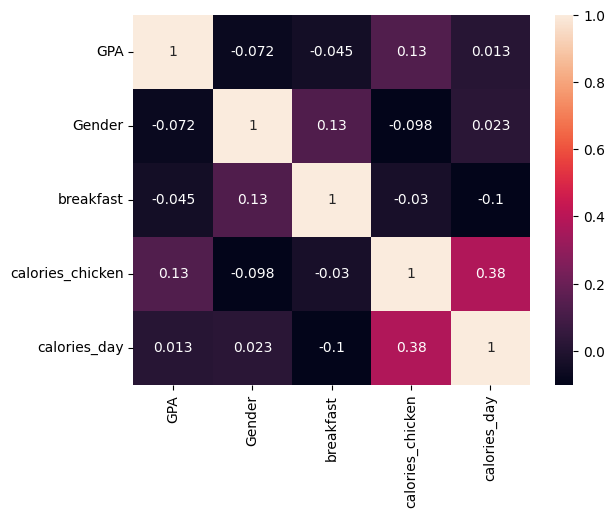

In [142]:
# plt.figure(figsize=(100 , 100))
sns.heatmap(correlation , annot=True)

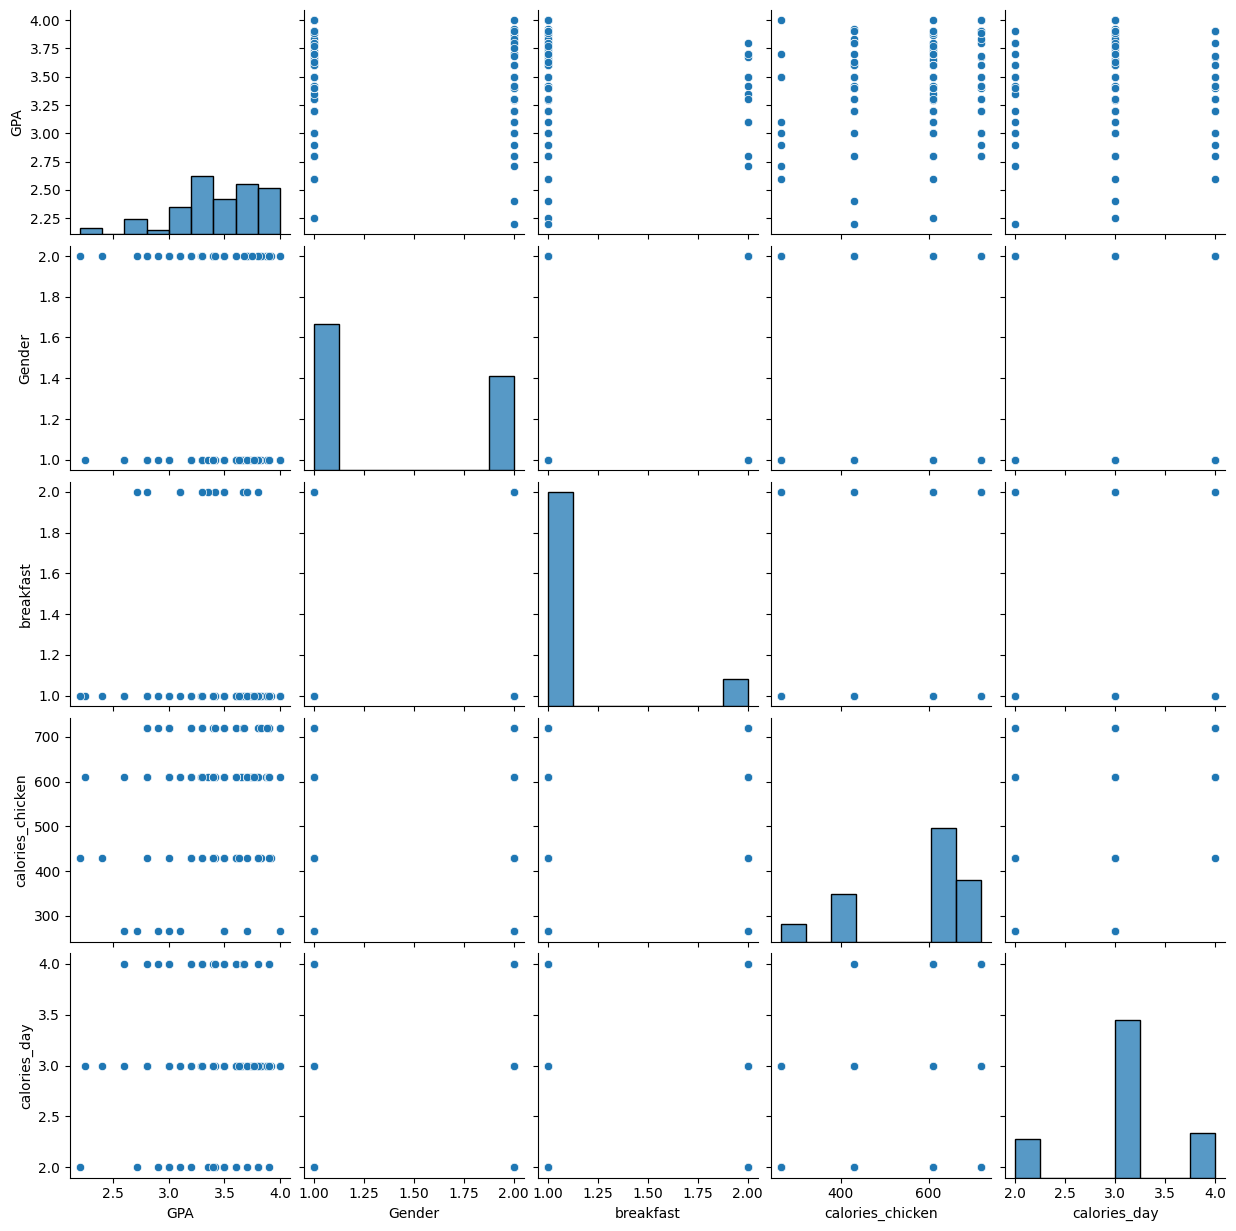

In [143]:
sns.pairplot(new_df)
plt.show()

In [144]:
# df.to_csv('cleaned_dataset.csv' , index=False)